# Anaylsis of Packets of Raw Data Pre Capacitor

Now we will try to use all the data to plot 1 second worth of time (first 10 rows). To do this we need to give the extra entries in the array time stamps. We will do this using the sampling frequency of 1000Hz to generate time stamps which are 0.001 larger than the previous one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from src.data_processing import create_data_from_entry

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Import and Clean Raw Data

First we import and clean the raw data. See `1-rdp-voltage-signal-exploration-pre-capacitor.ipynb` for a description of the cleaning. We will only be looking at a couple of rows of data at most so we don't need to import alot of data.

In [22]:
data = pd.read_csv("..\\data\\processed\\pre-capactitor-raw-data.csv", nrows=10)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,4.518552,4.450329,4.418448,4.399958,4.232905,4.364889,4.349268,4.384018,4.372859,4.489223,...,4.583588,4.619294,4.657232,4.733744,4.664564,4.699314,4.683055,4.667433,4.580400,2018-09-21 16:56:48.930999994
1,4.662333,4.594428,4.530986,4.521740,4.437258,4.376048,4.420680,4.308780,4.335241,4.349268,...,4.443634,4.479021,4.523972,4.572749,4.621207,4.601122,4.675722,4.678910,4.640973,2018-09-21 16:56:49.041000128
2,4.574343,4.545651,4.414623,4.446503,4.410478,4.276900,4.364252,4.322807,4.329821,4.408565,...,4.487310,4.581038,4.601760,4.649262,4.719398,4.696445,4.677954,4.710791,4.597616,2018-09-21 16:56:49.367999792
3,4.467225,4.557128,4.540231,4.637466,4.605267,4.711109,4.667433,4.705371,4.678273,4.630452,...,4.495280,4.479658,4.398364,4.403146,4.286783,4.359789,4.301766,4.342573,4.410478,2018-09-21 16:56:49.640000105
4,4.386568,4.472645,4.553302,4.616744,4.628539,4.760205,4.666477,4.698039,4.673172,4.654681,...,4.534811,4.435664,4.408565,4.401552,4.286145,4.342892,4.349268,4.333966,4.378279,2018-09-21 16:56:49.912999868


In [23]:
data.shape

(10, 101)

## Anaylsis of a packet of data

In [25]:
first_packet = create_data_from_entry(0, data)
first_packet.head()

,Datetime,Value
0,2018-09-21 16:56:48.930999994,4.518552
1,2018-09-21 16:56:48.932099995,4.450329
2,2018-09-21 16:56:48.933199996,4.418448
3,2018-09-21 16:56:48.934299997,4.399958
4,2018-09-21 16:56:48.935399998,4.232905


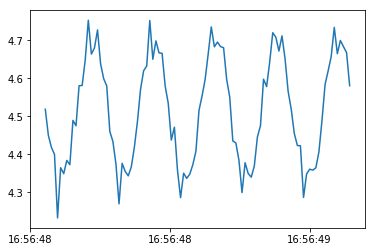

In [26]:
plt.plot(first_packet["Datetime"], first_packet["Value"])

As you can see, their is definitely a 50Hz wave underneath the data. Lets look at a second packet of data to see any more.

In [27]:
second_packet = create_data_from_entry(1, data)
second_packet.head()

,Datetime,Value
0,2018-09-21 16:56:49.041000128,4.662333
1,2018-09-21 16:56:49.044270124,4.594428
2,2018-09-21 16:56:49.047540120,4.530986
3,2018-09-21 16:56:49.050810116,4.521740
4,2018-09-21 16:56:49.054080112,4.437258


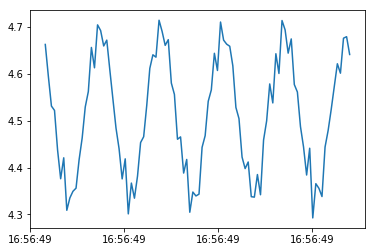

In [28]:
plt.plot(second_packet["Datetime"], second_packet["Value"])

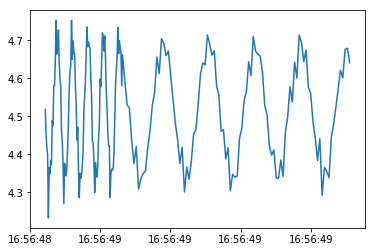

In [29]:
packets = pd.concat([first_packet, second_packet])
plt.plot(packets["Datetime"], packets["Value"])

## Conclusion

There is clearly a 50Hz wave as part of the signal just from looking at 2ms worth of data. The next notebook will look at the effect of averaging out this 50Hz wave by averaging points which are 180 degrees apart.